# **We are practicing perceptron trick**
<h2>Now the question arises that What is perceptron Trick?</h2>
<h4>In the perceptron trick we let the values of A , B and C after that we will get a line which will definetly be very terrible and Wrong
</h4>

1.   Now we will take a random point which will be representing a particular row of our data set and we will try to adjust the line in such a way that the line appears to be on such a place that the random point we have selected is now residing on the correct region.
2.   we will continue the process number of times (eppoch) and we will chose learning rate
3.   By multiplying learnig rate with weights for each wrong random point over a eppoch value we may get our desired line.

# **Demerits of perceptron rule/trick**


1.   You cannot Quantify that hw much correct is our line if working in 2d , a plane if working in 3d and a hyper plane if workingh in higher dimensions
2.   There may be much more better line or solution avialable.
3.   Each time it give a slightly changed line because it varys as random points are selected
2.   there is a chance that it may never converge as the point is selected randomly so it may select a po8int each time which is correctly placed although it is rare but still there is a chance.










In [ ]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


<h2> Genrating a classification data set with 200 sample values as sklearn have such capabilities to genrate regression and classification data sets</h2>

In [ ]:
# Step 2: Generate a dataset
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=200,   # number of samples
                           n_features=2,    # number of features
                           n_informative=1, # number of informative features
                           n_redundant=0,   # no redundant features
                           n_classes=2,     # binary classification
                           n_clusters_per_class=1,
                           hypercube=False,
                           class_sep=10,
                           random_state=41)

# Step 3: Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Target'] = Y

print(df.head())


   Feature1  Feature2  Target
0  0.461295  0.110563       1
1  0.492459 -0.366938       1
2  0.184285  1.846769       1
3 -1.291250  0.004190       0
4 -1.990034  0.967729       0


<h2>Using scatter plot to visualize is the data set generated is representing the classification or not</h2>

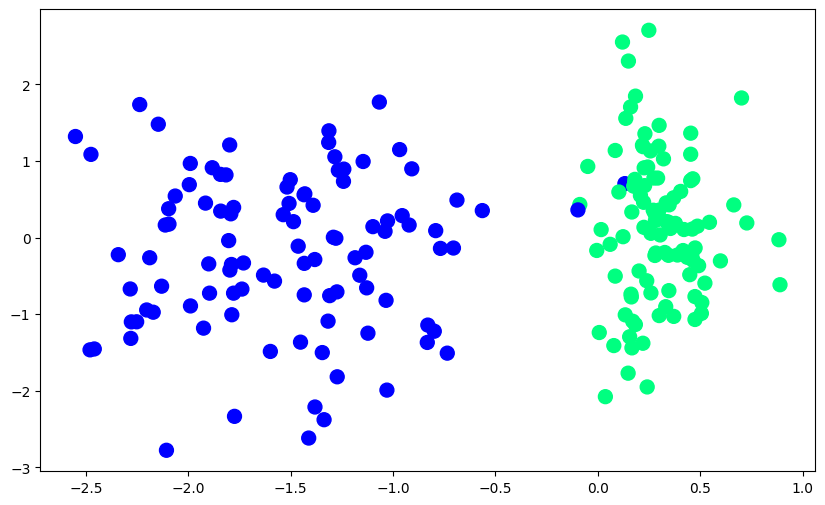

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1] , c=Y ,cmap="winter" ,s=100)

<h2> Here is main part we are adding a another col of 1s as biase and setting eppoch to 200 and implementimng the logic by using learning rate as 0.1 and using optimized formula


*   old weights = old weights + lr(y[j]-y_hat) * X[j]   




In [ ]:
def perceptron(X,Y):
  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1
  for i in range(200):
    j = np.random.randint(0,100)
    y_hat = np.dot(X[j],weights)
    weights = weights + lr*(Y[j]-y_hat)*X[j]
    return weights[0] , weights[1:]



<h2>This is the step function it returns 1 if function z is greater then 0 and returns 0 if its < 0

In [ ]:
def step(z):
  return 1 if z>0 else 0


<h3>These are values of A,B,C
here initercep_ is biase and coef_ is containing A,B</h3>

In [ ]:
intercep_ , coef_ = perceptron(X,Y)


In [ ]:
print(intercep_)
print(coef_)

0.9120112367387597
[ 1.00430102 -6.48172125]


The result depend on these below factor so i was just trying to control the line manualy as results were not to good


1.   coef_[1] = B => contol rotation along x - axis
2.   coef_[0] = A => contol rotation along y - axis
1.   intercep_ = C => contol the position of line vertically



In [ ]:
coef_[1] = coef_[1] - 0.1

In [ ]:
coef_[0] = coef_[0] + 4

In [ ]:
intercep_ = intercep_ + 2

<h2> Calculating m and b

In [ ]:
m = -(coef_[0]/coef_[1])
b = -(intercep_/coef_[1])

In [ ]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

Now finally plotting to see the results

(-3.0, 2.0)

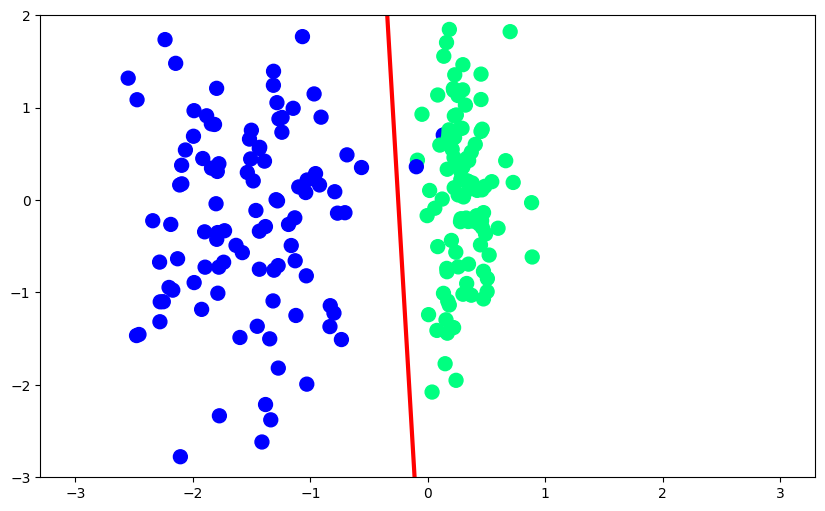

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input, color = 'red', linewidth=3)
plt.scatter(X[:,0],X[:,1] , c=Y ,cmap="winter" ,s=100)
plt.ylim(-3,2)